# Deep Learning on Tabular Data

In [78]:
# pip install pytorch-lightning

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
input_path = 'bank-additional-full.csv'
df = pd.read_csv(input_path, delimiter=';')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [82]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking Unique Values Of All The Features

In [83]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('-----'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
----------------------------------------------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
----------------------------------------------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------------------------------------------------------------------
default
['no' 'unknown' 

In [84]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [85]:
print(np.unique(df['y']))

[0 1]


In [86]:
id_cols = ['ID']
### categorical
cat_cols = list(df.select_dtypes(include=['object']))
print(" The Categorical Features are:\n",cat_cols)
### Numerical
num_cols = list(df.select_dtypes(exclude=['object']))
num_cols.remove('y')
print("The Numerical Features are:\n",num_cols)
label_col = 'y'

print('number of categorical columns: ', len(cat_cols))
print('number of numerical/float columns: ', len(num_cols))

 The Categorical Features are:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
The Numerical Features are:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
number of categorical columns:  10
number of numerical/float columns:  10


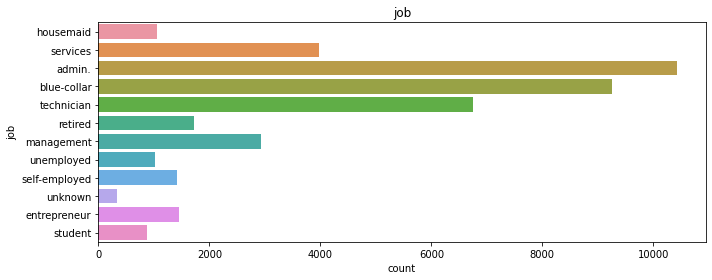

 Category is : job 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------


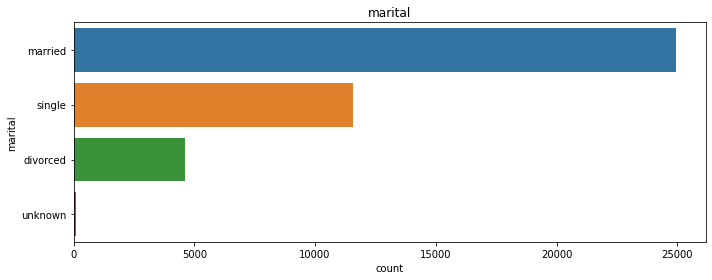

 Category is : marital 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------


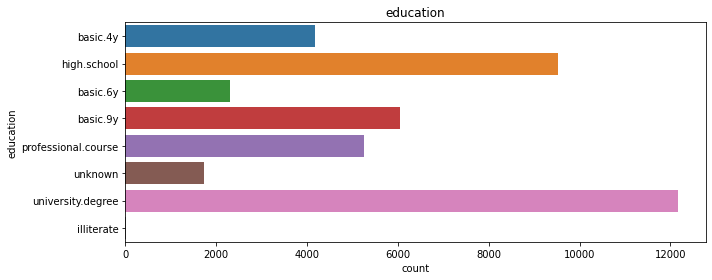

 Category is : education 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------


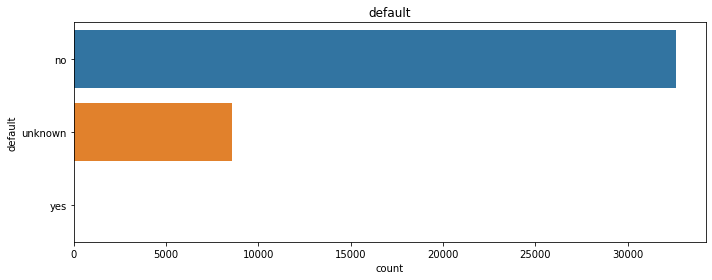

 Category is : default 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------------------------------------------------------------------


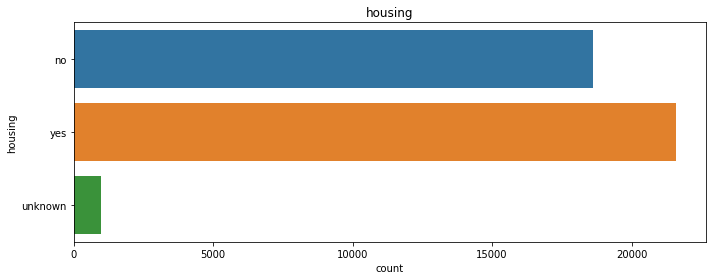

 Category is : housing 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
----------------------------------------------------------------------------------------------------


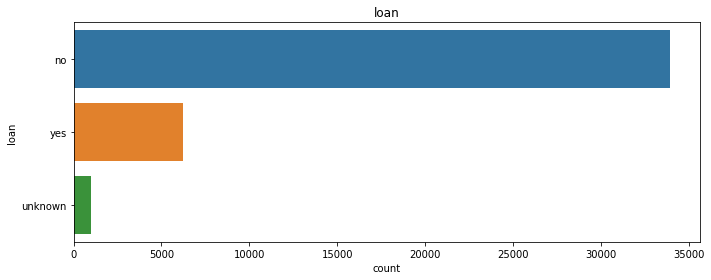

 Category is : loan 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
----------------------------------------------------------------------------------------------------


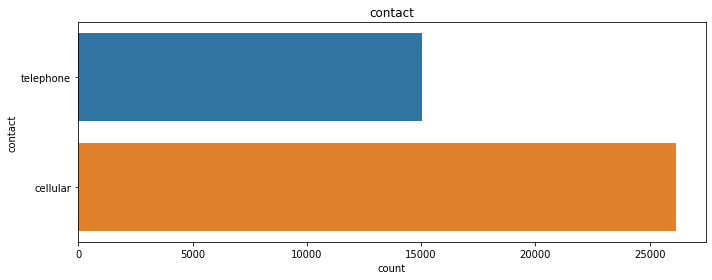

 Category is : contact 

cellular     26144
telephone    15044
Name: contact, dtype: int64
----------------------------------------------------------------------------------------------------


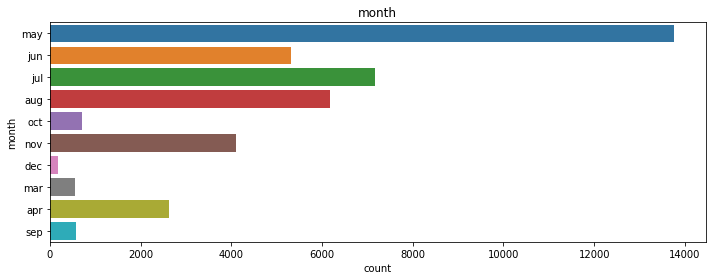

 Category is : month 

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
----------------------------------------------------------------------------------------------------


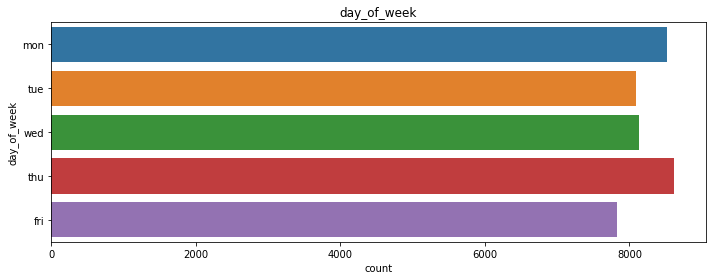

 Category is : day_of_week 

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
----------------------------------------------------------------------------------------------------


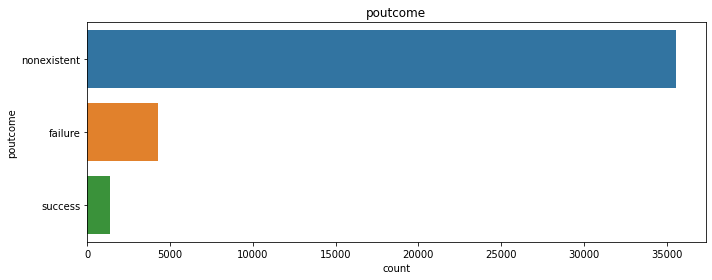

 Category is : poutcome 

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
----------------------------------------------------------------------------------------------------


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in cat_cols:
    
    plt.figure(figsize=(10,4))
    sns.countplot(y = col, data = df)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    print(" Category is :",col,"\n")
    print(df[col].value_counts())
    print('-----'*20)
     

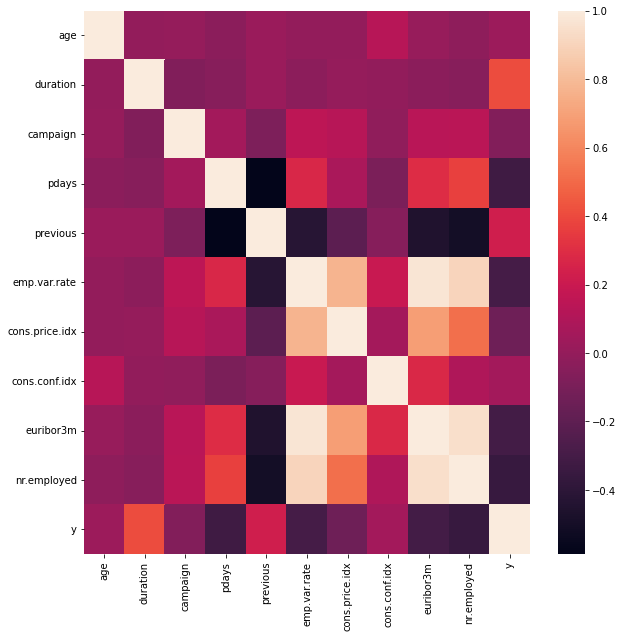

In [88]:
#finding the correlation among the variables
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())
plt.show()

In [89]:
test_size = 0.2
# val_size = 0.3
random_state = 1234

df_train, df_test = train_test_split(
    df,
    test_size=test_size,
    random_state=random_state,
    stratify=df['y'])

# df_train, df_val = train_test_split(
#     df_train,
#     test_size=val_size,
#     random_state=random_state,
#     stratify=df_train['y'])

print('train shape: ', df_train.shape)
# print('validation shape: ', df_val.shape)
print('test shape: ', df_test.shape)

df_train.head()

train shape:  (32950, 21)
test shape:  (8238, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15391,26,blue-collar,single,high.school,no,yes,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
26474,31,technician,married,high.school,no,no,no,cellular,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,0
15120,23,management,single,university.degree,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
1411,28,admin.,single,basic.9y,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
4116,24,services,single,high.school,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


In [90]:
# store the category code mapping, so we can encode any new incoming data
# other than our training set
cat_code_dict = {}
for col in cat_cols:
    category_col = df_train[col].astype('category')
    cat_code_dict[col] = {value: idx for idx, value in enumerate(category_col.cat.categories)} 
print("The categories in a dictionary",cat_code_dict)

The categories in a dictionary {'job': {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}, 'marital': {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}, 'education': {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}, 'default': {'no': 0, 'unknown': 1, 'yes': 2}, 'housing': {'no': 0, 'unknown': 1, 'yes': 2}, 'loan': {'no': 0, 'unknown': 1, 'yes': 2}, 'contact': {'cellular': 0, 'telephone': 1}, 'month': {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}, 'day_of_week': {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}, 'poutcome': {'failure': 0, 'nonexistent': 1, 'success': 2}}


In [91]:
scaler = StandardScaler()
scaler.fit(df_train[num_cols])


StandardScaler()

In [92]:
def preprocess(df, scaler, cat_code_dict, num_cols, cat_cols, label_col):
    df = df.copy()

    # numeric/float fields
    df[num_cols] = scaler.transform(df[num_cols])
    df[num_cols] = df[num_cols].astype(np.float32)

    # categorical fields
    for col in cat_cols:
        code_dict = cat_code_dict[col]
        code_fillna_value = len(code_dict)
        df[col] = df[col].map(code_dict).fillna(code_fillna_value).astype(np.int64)

    # label
    df[label_col] = df[label_col].astype(np.float32)
    return df

There are many ways to implement the data preprocessing step, I have implemented the following workflow:
 - perform train and test split.
 - encode categorical columns as distinct numerical ids.
 - standardize numerical columns.
 - save the preprocesed data.<br>

I preprocess the data once and save the output

In [93]:
df_groups = {
    'train': df_train,
    'test': df_test
}

data_dir = 'bank_data'
os.makedirs(data_dir, exist_ok=True)

for name, df_group in df_groups.items():
    filename = os.path.join(data_dir, f'{name}.csv')
    df_preprocessed = preprocess(df_group, scaler, cat_code_dict, num_cols, cat_cols, label_col)
    df_preprocessed.to_csv(filename, index=False)

df_preprocessed.dtypes

age               float32
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration          float32
campaign          float32
pdays             float32
previous          float32
poutcome            int64
emp.var.rate      float32
cons.price.idx    float32
cons.conf.idx     float32
euribor3m         float32
nr.employed       float32
y                 float32
dtype: object

In [94]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import TensorBoardLogger

Here I defined a custom Dataset that loads the preprocessed .csv file, and extract the numerical, categorical, and label columns.

In [95]:
class TabularDataset(Dataset):

    def __init__(self, path, num_cols, cat_cols, label_col):
        self.path = path
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.label_col = label_col
        self.df = read_data(path, num_cols,  cat_cols, label_col)

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        num_array = self.df[self.num_cols].iloc[idx].values
        cat_array = self.df[self.cat_cols].iloc[idx].values
        label_array = self.df[self.label_col].iloc[idx]
        return num_array, cat_array, label_array


def read_data(path, num_cols, cat_cols, label_col):
    float_cols = num_cols 
    dtype = {col: np.float32 for col in float_cols}
    dtype.update({col: np.int64 for col in cat_cols})
    return pd.read_csv(path, dtype=dtype)

In [96]:
batch_size = 3

path_train = os.path.join(data_dir, 'train.csv')
dataset = TabularDataset(path_train, num_cols, cat_cols, label_col)
data_loader = DataLoader(dataset, batch_size)

## The data loader now returns batches of numerical/categorical/label tensor
num_tensor, cat_tensor, label_tensor = next(iter(data_loader))

print('\nnumerical value tensor:\n', num_tensor)
print('\ncategorical value tensor:\n', cat_tensor)
print('\nlabel tensor:\n', label_tensor)


numerical value tensor:
 tensor([[-1.3444, -0.5498, -0.5648,  0.1946, -0.3458,  0.8366,  0.5889, -0.4754,
          0.7683,  0.8436],
        [-0.8653, -0.4195, -0.5648,  0.1946,  1.6903, -0.1183, -0.6515, -0.3240,
          0.2602,  0.3962],
        [-1.6319, -0.4770, -0.5648,  0.1946, -0.3458,  0.8366,  0.5889, -0.4754,
          0.7689,  0.8436]])

categorical value tensor:
 tensor([[1, 2, 3, 0, 2, 0, 0, 3, 0, 1],
        [9, 1, 3, 0, 0, 0, 0, 7, 2, 0],
        [4, 2, 6, 0, 2, 0, 0, 3, 2, 1]])

label tensor:
 tensor([0., 0., 0.], dtype=torch.float64)


As asked in the question I have used PyTorch Lightning for organizing my neural network model. It is helpful when it comes to standardizing the structure, and avoid manually writing the training loop compared to vanilla PyTorch.

In [97]:
class TabularDataModule(pl.LightningDataModule):

    def __init__(self, data_dir, num_cols,  cat_cols, label_col, num_workers=5,
                 batch_size_train=512,  batch_size_test=512):
        super().__init__()
        self.data_dir = data_dir
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.label_col = label_col
        self.num_workers = num_workers
        self.batch_size_train = batch_size_train
        self.batch_size_test = batch_size_test

    def setup(self, stage):
        num_cols = self.num_cols
        cat_cols = self.cat_cols
        label_col = self.label_col
        # storing the path of the train dataset
        path_train = os.path.join(self.data_dir, 'train.csv')
        self.dataset_train = TabularDataset(path_train, num_cols, cat_cols, label_col)
        # storing the path of the test dataset
        path_test = os.path.join(self.data_dir, 'test.csv')
        self.dataset_test = TabularDataset(path_test, num_cols, cat_cols, label_col)

    def train_dataloader(self):
        return DataLoader( self.dataset_train,num_workers=self.num_workers, batch_size=self.batch_size_train,shuffle=True)

    def test_dataloader(self):
        return DataLoader(self.dataset_test,num_workers=self.num_workers,batch_size=self.batch_size_test,shuffle=False)

Deep learning with tabular data helps create an embedding layer for each of the categorical features in the dataset, and concatenate them together with the rest of the other numerical features.

In [98]:
class TabularNet(pl.LightningModule):

    def __init__(self, num_cols,  cat_cols, embedding_size_dict, n_classes,
                 embedding_dim_dict=None, learning_rate=0.01):
        super().__init__()
        # pytorch lightning black magic, all the arguments can now be
        # accessed through self.hparams.[argument]
        self.save_hyperparameters()
        self.embeddings, total_embedding_dim = self._create_embedding_layers(
            cat_cols, embedding_size_dict, embedding_dim_dict)
        # concatenate the numerical variables and the embedding layers
        # then proceed with the rest of the sequential flow
        in_features = len(num_cols) + total_embedding_dim
        self.layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, n_classes)
        )

    @staticmethod
    def _create_embedding_layers(cat_cols, embedding_size_dict, embedding_dim_dict):
        """construct the embedding layer, 1 per each categorical variable"""
        total_embedding_dim = 0
        embeddings = {}
        for col in cat_cols:
            embedding_size = embedding_size_dict[col]
            embedding_dim = embedding_dim_dict[col]
            total_embedding_dim += embedding_dim
            embeddings[col] = nn.Embedding(embedding_size, embedding_dim)

        return nn.ModuleDict(embeddings), total_embedding_dim

    def forward(self, num_tensor, cat_tensor):
        # run through all the categorical variables through its
        # own embedding layer and concatenate them together
        cat_outputs = []
        for i, col in enumerate(self.hparams.cat_cols):
            embedding = self.embeddings[col]
            cat_output = embedding(cat_tensor[:, i])
            cat_outputs.append(cat_output)
        cat_outputs = torch.cat(cat_outputs, dim=1)
        # concatenate the categorical embedding and numerical layer
        all_outputs = torch.cat((num_tensor, cat_outputs), dim=1)
        # for binary classification or regression we don't need the additional dimension
        final_outputs = self.layers(all_outputs).squeeze(dim=1)
        return final_outputs

    def training_step(self, batch, batch_idx):
        loss = self.compute_loss(batch, batch_idx)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        loss = self.compute_loss(batch, batch_idx)
        self.log('test_loss', loss, prog_bar=True)
        return loss
    

    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        return self(batch)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)

    def compute_loss(self, batch, batch_idx):
        num_tensor, cat_tensor, label_tensor = batch
        output_tensor = self(num_tensor, cat_tensor)
        loss = F.binary_cross_entropy_with_logits(output_tensor, label_tensor)
        return loss


The hyperparameters including the number of layers, units per layer and the embedding size below are all chosen in a somewhat arbitrary manner and one can perform some hyperparameter tuning or tweak the layer definition for better performance.

In [99]:
n_classes = 1

embedding_size_dict = {col: len(code) for col, code in cat_code_dict.items()}
print("The number of unique categories of each categorical features:\n",embedding_size_dict)
embedding_dimension_dict = {col: (embedding_size+1) // 2 for col, embedding_size in embedding_size_dict.items()}
print("The embedding dimensions for each categorical features:\n",embedding_dimension_dict)

The number of unique categories of each categorical features:
 {'job': 12, 'marital': 4, 'education': 8, 'default': 3, 'housing': 3, 'loan': 3, 'contact': 2, 'month': 10, 'day_of_week': 5, 'poutcome': 3}
The embedding dimensions for each categorical features:
 {'job': 6, 'marital': 2, 'education': 4, 'default': 2, 'housing': 2, 'loan': 2, 'contact': 1, 'month': 5, 'day_of_week': 3, 'poutcome': 2}


In [100]:
tabular_data_module = TabularDataModule(data_dir, num_cols, cat_cols, label_col)
print("The Tabular Data Module :",tabular_data_module," returns the train and test dataloader\n")
# we can print out the network architecture for inspection
tabular_model = TabularNet(num_cols, cat_cols, embedding_size_dict, n_classes, embedding_dimension_dict)
print("The pytorch lightening architecture is :\n",tabular_model)

The Tabular Data Module : <__main__.TabularDataModule object at 0x7f3c4ceabdf0>  returns the train and test dataloader

The pytorch lightening architecture is :
 TabularNet(
  (embeddings): ModuleDict(
    (job): Embedding(12, 6)
    (marital): Embedding(4, 2)
    (education): Embedding(8, 4)
    (default): Embedding(3, 2)
    (housing): Embedding(3, 2)
    (loan): Embedding(3, 2)
    (contact): Embedding(2, 1)
    (month): Embedding(10, 5)
    (day_of_week): Embedding(5, 3)
    (poutcome): Embedding(3, 2)
  )
  (layers): Sequential(
    (0): Linear(in_features=39, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)


I have defined a function to predict the class of the target feature and returned along with its actual given value.

In [101]:
def predict(tabular_model, data_loader):
    # data_loader = tabular_data_module.test_dataloader()
    batch_size = data_loader.batch_size
    n_rows = len(data_loader)
    y_true = [] # defining an empty list to store the actual target values later 
    # Assigning zeros as the initial predicted values
    y_pred = np.zeros(n_rows, dtype=np.float32)
    print('y_pred shape: ', y_pred.shape)
    with torch.no_grad():
      idx = 0
      print('idx:',idx)
      for num_batch, cat_batch, label_batch in data_loader:
        # Concatenating the outputs for categorical and numerical data
        y_output = tabular_model(num_batch, cat_batch)
        # Finding out the predicted values for every datapoint
        y_prob = torch.sigmoid(y_output).cpu().numpy()
        start_idx = idx
        idx += batch_size
        end_idx = idx
        y_pred[start_idx:end_idx] = y_prob
        y_true[start_idx:end_idx] = label_batch.cpu().numpy()
        if end_idx == n_rows:
          break
    
    return y_true, y_pred

In [102]:
import sklearn.metrics as metrics

# Computing the score by defining a function which takes the actual and predicted values obtained after training our model
def compute_score(y_true, y_pred, round_digits=3):
    log_loss = round(metrics.log_loss(y_true, y_pred), round_digits)
    auc = round(metrics.roc_auc_score(y_true, y_pred), round_digits)
    precision, recall, threshold = metrics.precision_recall_curve(y_true, y_pred)
    f1 = 2 * (precision * recall) / (precision + recall)
    mask = ~np.isnan(f1)
    f1 = f1[mask]
    precision = precision[mask]
    recall = recall[mask]
    best_index = np.argmax(f1)
    threshold = round(threshold[best_index], round_digits)
    precision = round(precision[best_index], round_digits)
    recall = round(recall[best_index], round_digits)
    f1 = round(f1[best_index], round_digits)

    return {'auc': auc,'precision': precision,'recall': recall,'f1': f1, 'threshold': threshold,'log_loss': log_loss,}

In [103]:
from torch.utils.data.dataset import ConcatDataset
from sklearn.model_selection import KFold

k_folds = 3
kfold=KFold(n_splits=k_folds,shuffle=False)

path_train = os.path.join(data_dir, 'train.csv')
dataset_train = TabularDataset(path_train, num_cols, cat_cols, label_col)
path_test = os.path.join(data_dir, 'test.csv')
dataset_test = TabularDataset(path_test, num_cols, cat_cols, label_col)
dataset = ConcatDataset([dataset_test, dataset_train])


# K-Fold implementation
for fold,(train_idx,test_idx) in enumerate(kfold.split(dataset)):
  print(train_idx, test_idx)
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_idx)
  # train data loader
  trainloader = torch.utils.data.DataLoader( dataset, batch_size=1, num_workers=2, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader( dataset, batch_size=1, num_workers=2, sampler=test_subsampler)
  trainer = pl.Trainer(max_epochs=1, precision=16 )
  trainer.fit(tabular_model, trainloader)
  num_tensor_train, cat_tensor_train, label_tensor_train = next(iter(trainloader))
  # predicting on test data 
  tabular_model_loaded = TabularNet.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
  tabular_model.eval()
  with torch.no_grad():
    model_pred_loaded = tabular_model_loaded(num_tensor_train, cat_tensor_train)
  y_true, y_pred = predict(tabular_model_loaded, testloader)
  score = compute_score(y_true, y_pred)
  print(f'testing Data fold:{fold} score is :{score}')


  



/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:702: UserWarning: You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU. Using `precision='bf16'` instead.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type       | Params
------------------------------------------
0 | embeddings | ModuleDict | 203   
1 | layers     | Sequential | 38.4 K
------------------------------------------
38.6 K    Trainable params
0         Non-trainable params
38.6 K    Total params


[13730 13731 13732 ... 41185 41186 41187] [    0     1     2 ... 13727 13728 13729]


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


y_pred shape:  (13730,)
idx: 0


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:702: UserWarning: You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU. Using `precision='bf16'` instead.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type       | Params
------------------------------------------
0 | embeddings | ModuleDict | 203   
1 | layers     | Sequential | 38.4 K
------------------------------------------
38.6 K    Trainable params
0         Non-trainable params
38.6 K    Total params


testing Data fold:0 score is :{'auc': 0.926, 'precision': 0.534, 'recall': 0.759, 'f1': 0.627, 'threshold': 0.462, 'log_loss': 0.208}
[    0     1     2 ... 41185 41186 41187] [13730 13731 13732 ... 27456 27457 27458]


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


y_pred shape:  (13729,)
idx: 0


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:702: UserWarning: You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU. Using `precision='bf16'` instead.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type       | Params
------------------------------------------
0 | embeddings | ModuleDict | 203   
1 | layers     | Sequential | 38.4 K
------------------------------------------
38.6 K    Trainable params
0         Non-trainable params
38.6 K    Total params


testing Data fold:1 score is :{'auc': 0.909, 'precision': 0.517, 'recall': 0.667, 'f1': 0.583, 'threshold': 0.436, 'log_loss': 0.251}
[    0     1     2 ... 27456 27457 27458] [27459 27460 27461 ... 41185 41186 41187]


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


y_pred shape:  (13729,)
idx: 0
testing Data fold:2 score is :{'auc': 0.929, 'precision': 0.517, 'recall': 0.769, 'f1': 0.619, 'threshold': 0.32, 'log_loss': 0.2}


The **F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. In our case F1 score is closer to 1 , therefore, we can comment that our neural network model is good.<br>

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. In our case our **AUC(Area under the curve)** is close to 1, concluding that our model's performance is really good.<br>

**Log-loss** is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value. In our case the log loss value is closer to zero indicating that our model's performance is quite good.<br>

